# Grand average perception reconstruciton

## from Euclidean no cross validation

In [1]:
import mne
import numpy as np
import pandas as pd
from scipy.spatial import procrustes
from IPython.core.debugger import set_trace
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform
%run Recon_class.ipynb
%run general_tools.ipynb
%run EEG_auxiliary_module.ipynb
stims = pd.read_csv('C:\\Users\\danne\\Dropbox\\Ilya_study\\Stimuli\\stims.csv')
descr = pd.read_csv('C:\\Users\\danne\\Dropbox\\Ilya_study\\Analysis\\description.csv', index_col = 'Nums') # loading origin desription
ims_names, prc_names, _ = import_names()
infolder, outfolder = find_folder()
loaded = np.load('C:\\Users\\danne\\Documents\\UofT\\Discrimination\\euclidean_no_cv.npz')
temp = loaded['results']
temp = np.nanmean(temp, axis=(0,1))
data = np.squeeze(squareform(squareform(temp, checks=False)))
conf_prc_df = pd.DataFrame(data[:50,:50], index=prc_names, columns=prc_names)



recon_prc = Reconstruction(rc_conf_df=conf_prc_df, tr_conf_df=conf_prc_df, ims_df=stims, dims_n=20, image_size=(98,75,3))
recon_prc.project_face_space(kind = 'custom').ims2lab().face_reconst(blow='both').lab2ims().distance_test()
recon_prc.add_column_to_summary(descr, 'names')
recon_prc.show_face_space(dims=(0,1))
#result_prc.sort_values(by = 'origin').to_clipboard()

C:\Users\danne\Anaconda3\envs\eeg_analysis\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: Mean of empty slice
C:\Users\danne\Anaconda3\envs\eeg_analysis\lib\site-packages\skimage\color\colorconv.py:1068: UserWarning: Color data out of range: Z < 0 in 3 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))
C:\Users\danne\Anaconda3\envs\eeg_analysis\lib\site-packages\skimage\color\colorconv.py:1068: UserWarning: Color data out of range: Z < 0 in 4 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))
C:\Users\danne\Anaconda3\envs\eeg_analysis\lib\site-packages\skimage\color\colorconv.py:1068: UserWarning: Color data out of range: Z < 0 in 2 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))
C:\Users\danne\Anaconda3\envs\eeg_analysis\lib\site-packages\skimage\color\colorconv.py:1068: UserWarning: Color data out of range: Z < 0 in 1 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))
C:\Users\danne\Anaconda3\envs\eeg_analysis\lib\site-packages\skim

The overall accuracy is 41.80%


<Figure size 2000x1000 with 2 Axes>

## from Pearson no cross-validation

In [1]:
import mne
import numpy as np
import pandas as pd
from scipy.spatial import procrustes
from IPython.core.debugger import set_trace
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform
%run Recon_class.ipynb
%run general_tools.ipynb
%run EEG_auxiliary_module.ipynb
stims = pd.read_csv('C:\\Users\\danne\\Dropbox\\Ilya_study\\Stimuli\\stims.csv')
descr = pd.read_csv('C:\\Users\\danne\\Dropbox\\Ilya_study\\Analysis\\description.csv', index_col = 'Nums') # loading origin desription
ims_names, prc_names, _ = import_names()
infolder, outfolder = find_folder()
loaded = np.load('C:\\Users\\danne\\Documents\\UofT\\Discrimination\\pearson_no_cv.npz')
temp = loaded['results']
temp = np.nanmean(temp, axis=(0,1))
data = np.squeeze(squareform(squareform(temp, checks=False)))
conf_prc_df = pd.DataFrame(data[:50,:50], index=prc_names, columns=prc_names)



recon_prc = Reconstruction(rc_conf_df=conf_prc_df, tr_conf_df=conf_prc_df, ims_df=stims, dims_n=20, image_size=(98,75,3))
recon_prc.project_face_space(kind = 'custom').ims2lab().face_reconst(blow='both').lab2ims().distance_test()
recon_prc.add_column_to_summary(descr, 'names')
recon_prc.show_face_space(dims=(0,1))
#result_prc.sort_values(by = 'origin').to_clipboard()

C:\Users\danne\Anaconda3\envs\eeg_analysis\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: Mean of empty slice
C:\Users\danne\Anaconda3\envs\eeg_analysis\lib\site-packages\skimage\color\colorconv.py:1068: UserWarning: Color data out of range: Z < 0 in 4 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))
C:\Users\danne\Anaconda3\envs\eeg_analysis\lib\site-packages\skimage\color\colorconv.py:1068: UserWarning: Color data out of range: Z < 0 in 7 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))
C:\Users\danne\Anaconda3\envs\eeg_analysis\lib\site-packages\skimage\color\colorconv.py:1068: UserWarning: Color data out of range: Z < 0 in 1 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))
C:\Users\danne\Anaconda3\envs\eeg_analysis\lib\site-packages\skimage\color\colorconv.py:1068: UserWarning: Color data out of range: Z < 0 in 2 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))
C:\Users\danne\Anaconda3\envs\eeg_analysis\lib\site-packages\skim

The overall accuracy is 43.14%


<Figure size 2000x1000 with 2 Axes>

## from Euclidean with cross-validation

In [3]:
import mne
import numpy as np
import pandas as pd
from scipy.spatial import procrustes
from IPython.core.debugger import set_trace
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform
%run Recon_class.ipynb
%run general_tools.ipynb
%run EEG_auxiliary_module.ipynb
stims = pd.read_csv('C:\\Users\\danne\\Dropbox\\Ilya_study\\Stimuli\\stims.csv')
descr = pd.read_csv('C:\\Users\\danne\\Dropbox\\Ilya_study\\Analysis\\description.csv', index_col = 'Nums') # loading origin desription
ims_names, prc_names, _ = import_names()
infolder, outfolder = find_folder()
loaded = np.load('C:\\Users\\danne\\Documents\\UofT\\Discrimination\\distance_with_cv.npz')
temp = loaded['result_ec']
temp = np.nanmean(temp, axis=(0,1))
data = np.squeeze(squareform(squareform(temp, checks=False)))
conf_prc_df = pd.DataFrame(data[:50,:50], index=prc_names, columns=prc_names)



recon_prc = Reconstruction(rc_conf_df=conf_prc_df, tr_conf_df=conf_prc_df, ims_df=stims, dims_n=20, image_size=(98,75,3))
recon_prc.project_face_space(kind = 'custom').ims2lab().face_reconst(blow='both').lab2ims().distance_test()
recon_prc.add_column_to_summary(descr, 'names')
#recon_prc.show_face_space(dims=(0,1))
#result_prc.sort_values(by = 'origin').to_clipboard()

C:\Users\danne\Anaconda3\envs\eeg_analysis\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: Mean of empty slice
C:\Users\danne\Anaconda3\envs\eeg_analysis\lib\site-packages\skimage\color\colorconv.py:1068: UserWarning: Color data out of range: Z < 0 in 1 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))
C:\Users\danne\Anaconda3\envs\eeg_analysis\lib\site-packages\skimage\color\colorconv.py:1068: UserWarning: Color data out of range: Z < 0 in 2 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))
C:\Users\danne\Anaconda3\envs\eeg_analysis\lib\site-packages\skimage\color\colorconv.py:1068: UserWarning: Color data out of range: Z < 0 in 3 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))
C:\Users\danne\Anaconda3\envs\eeg_analysis\lib\site-packages\skimage\color\colorconv.py:1068: UserWarning: Color data out of range: Z < 0 in 7 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))
C:\Users\danne\Anaconda3\envs\eeg_analysis\lib\site-packages\skim

The overall accuracy is 42.41%


In [2]:
import numpy as np
loaded = np.load('C:\\Users\\danne\\Documents\\UofT\\Discrimination\\distance_with_cv.npz')

## from Pearson with cross-validation

In [4]:
import mne
import numpy as np
import pandas as pd
from scipy.spatial import procrustes
from IPython.core.debugger import set_trace
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform
%run Recon_class.ipynb
%run general_tools.ipynb
%run EEG_auxiliary_module.ipynb
stims = pd.read_csv('C:\\Users\\danne\\Dropbox\\Ilya_study\\Stimuli\\stims.csv')
descr = pd.read_csv('C:\\Users\\danne\\Dropbox\\Ilya_study\\Analysis\\description.csv', index_col = 'Nums') # loading origin desription
ims_names, prc_names, _ = import_names()
infolder, outfolder = find_folder()
loaded = np.load('C:\\Users\\danne\\Documents\\UofT\\Discrimination\\distance_with_cv.npz')
temp = loaded['result_pc']
temp = np.nanmean(temp, axis=(0,1))
data = np.squeeze(squareform(squareform(temp, checks=False)))
conf_prc_df = pd.DataFrame(data[:50,:50], index=prc_names, columns=prc_names)



recon_prc = Reconstruction(rc_conf_df=conf_prc_df, tr_conf_df=conf_prc_df, ims_df=stims, dims_n=20, image_size=(98,75,3))
recon_prc.project_face_space(kind = 'custom').ims2lab().face_reconst(blow='both').lab2ims().distance_test()
recon_prc.add_column_to_summary(descr, 'names')

C:\Users\danne\Anaconda3\envs\eeg_analysis\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: Mean of empty slice
C:\Users\danne\Anaconda3\envs\eeg_analysis\lib\site-packages\skimage\color\colorconv.py:1068: UserWarning: Color data out of range: Z < 0 in 5 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))


The overall accuracy is 44.45%


# Theoretical observer

C:\Users\danne\Anaconda3\lib\site-packages\skimage\color\colorconv.py:988: UserWarning: Color data out of range: Z < 0 in 18 pixels
  warn('Color data out of range: Z < 0 in %s pixels' % invalid[0].size)


The overall accuracy is 96.86%


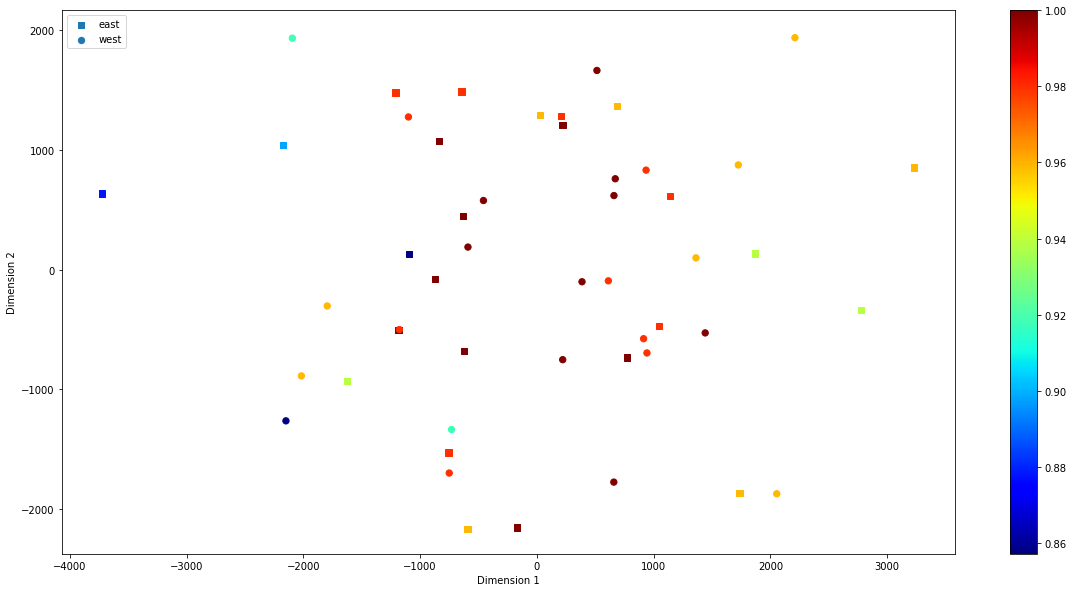

,values,names,acc,origin
0,0.897959,adi,5185.869282,east
1,0.979592,ago,5009.591525,east
2,0.959184,aha,5223.563763,west
3,0.979592,ake,4995.217117,west
4,1.000000,ama,4490.384285,east


In [12]:
import mne
import numpy as np
import pandas as pd
from scipy.spatial import procrustes
from IPython.core.debugger import set_trace
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform
%run Recon_class.ipynb
%run general_tools.ipynb
%run EEG_auxiliary_module.ipynb
stims = pd.read_csv('C:\\Users\\danne\\Dropbox\\Ilya_study\\Stimuli\\stims.csv')
descr = pd.read_csv('C:\\Users\\danne\\Dropbox\\Ilya_study\\Analysis\\description.csv', index_col = 'Nums') # loading origin desription
dist = pd.DataFrame(squareform(pdist(stims.T)),columns=stims.columns,index=stims.columns)
ims_names, prc_names, _ = import_names()
infolder, outfolder = find_folder()
recon_io = Reconstruction(rc_conf_df=dist, tr_conf_df=dist, ims_df=stims, dims_n=20, image_size=(98,75,3))
recon_io.project_face_space(kind = 'custom').ims2lab().face_reconst(blow='both').lab2ims().distance_test(kind = 'other').add_column_to_summary(descr, 'names')
recon_io.show_face_space(dims=(0,1))
result_io = recon_io.present_summary()
result_io.head()
#result_io.sort_values(by = 'origin').to_clipboard()

# Perception reconstruction

C:\Users\danne\Anaconda3\lib\site-packages\skimage\color\colorconv.py:988: UserWarning: Color data out of range: Z < 0 in 13 pixels
  warn('Color data out of range: Z < 0 in %s pixels' % invalid[0].size)
C:\Users\danne\Anaconda3\lib\site-packages\skimage\color\colorconv.py:988: UserWarning: Color data out of range: Z < 0 in 8 pixels
  warn('Color data out of range: Z < 0 in %s pixels' % invalid[0].size)
C:\Users\danne\Anaconda3\lib\site-packages\skimage\color\colorconv.py:988: UserWarning: Color data out of range: Z < 0 in 11 pixels
  warn('Color data out of range: Z < 0 in %s pixels' % invalid[0].size)
C:\Users\danne\Anaconda3\lib\site-packages\skimage\color\colorconv.py:988: UserWarning: Color data out of range: Z < 0 in 12 pixels
  warn('Color data out of range: Z < 0 in %s pixels' % invalid[0].size)


The overall accuracy is 52.57%


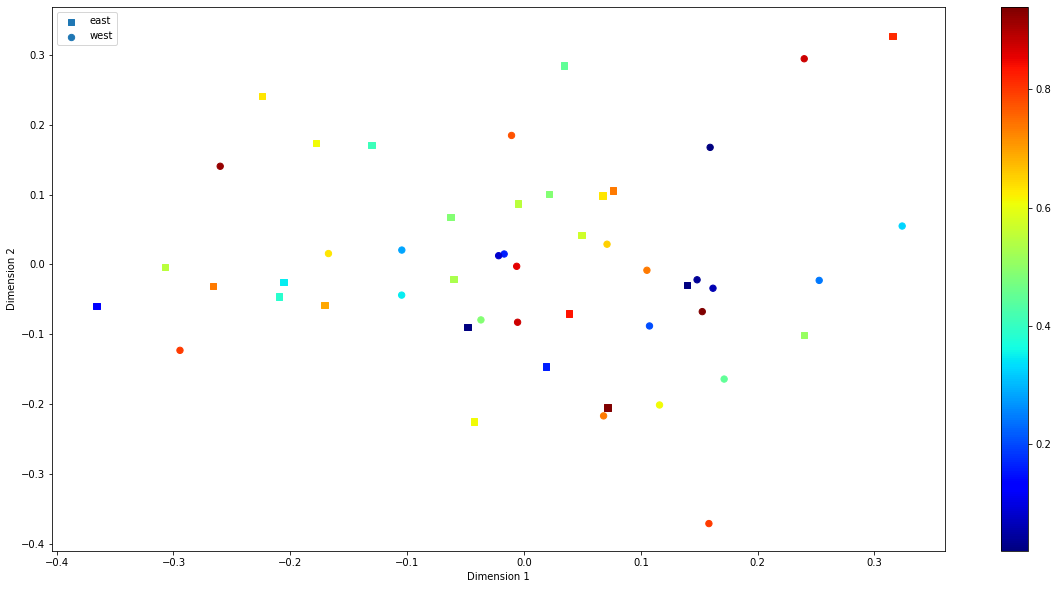

In [8]:
import mne
import numpy as np
import pandas as pd
from scipy.spatial import procrustes
from IPython.core.debugger import set_trace
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform
%run Recon_class.ipynb
%run general_tools.ipynb
%run EEG_auxiliary_module.ipynb
stims = pd.read_csv('C:\\Users\\danne\\Dropbox\\Ilya_study\\Stimuli\\stims.csv')
descr = pd.read_csv('C:\\Users\\danne\\Dropbox\\Ilya_study\\Analysis\\description.csv', index_col = 'Nums') # loading origin desription
ims_names, prc_names, _ = import_names()
infolder, outfolder = find_folder()
data = load_pkl(outfolder, 'svm_prc_accuracy.pkl')
data = np.array(data)
conf_prc_df = pd.DataFrame(data[:,:50,:50].mean(axis=0), index=prc_names, columns=prc_names)



recon_prc = Reconstruction(rc_conf_df=conf_prc_df, tr_conf_df=conf_prc_df, ims_df=stims, dims_n=20, image_size=(98,75,3))
recon_prc.project_face_space(kind = 'custom').ims2lab().face_reconst(blow='both').lab2ims().distance_test()
recon_prc.add_column_to_summary(descr, 'names')
recon_prc.show_face_space(dims=(0,1))
#result_prc.sort_values(by = 'origin').to_clipboard()

C:\Users\danne\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: Mean of empty slice


The overall accuracy is 40.29%


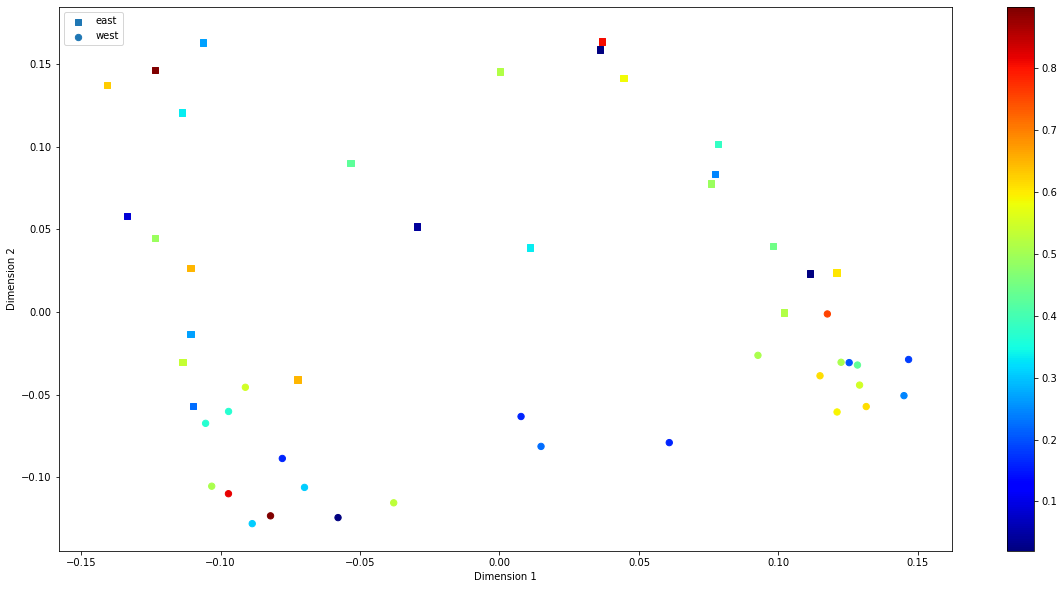

In [18]:
import mne
import numpy as np
import pandas as pd
from scipy.spatial import procrustes
from IPython.core.debugger import set_trace
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform
%run Recon_class.ipynb
%run general_tools.ipynb
%run EEG_auxiliary_module.ipynb
stims = pd.read_csv('C:\\Users\\danne\\Dropbox\\Ilya_study\\Stimuli\\stims.csv')
descr = pd.read_csv('C:\\Users\\danne\\Dropbox\\Ilya_study\\Analysis\\description.csv', index_col = 'Nums') # loading origin desription
ims_names, prc_names, _ = import_names()
infolder, outfolder = find_folder()
loaded = np.load('E:\\Ilya_study\\Confusion matrices\\combined.npz')
temp = loaded['results']
temp = np.nanmean(temp, axis=(0,1))
data = np.squeeze(squareform(squareform(temp, checks=False)))
conf_prc_df = pd.DataFrame(data[:50,:50], index=prc_names, columns=prc_names)



recon_prc = Reconstruction(rc_conf_df=conf_prc_df, tr_conf_df=conf_prc_df, ims_df=stims, dims_n=20, image_size=(98,75,3))
recon_prc.project_face_space(kind = 'custom').ims2lab().face_reconst(blow='both').lab2ims().distance_test()
recon_prc.add_column_to_summary(descr, 'names')
recon_prc.show_face_space(dims=(0,1))
#result_prc.sort_values(by = 'origin').to_clipboard()

In [24]:
loaded = np.load('E:\\Ilya_study\\Confusion matrices\\combined.npz')
temp = loaded['results']
temp = np.nanmean(temp, axis=(1))
b = list()
for i in range(temp.shape[0]):
    a = squareform(temp[i,:,:], checks=False)
    b.append(squareform(a))
data = np.array(b)

#data = np.squeeze(squareform(squareform(temp, checks=False)))

C:\Users\danne\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice
  This is separate from the ipykernel package so we can avoid doing imports until


# Imagery reconstruction

In [7]:
import mne
import numpy as np
import pandas as pd
from scipy.spatial import procrustes
from IPython.core.debugger import set_trace
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform
%run Recon_class.ipynb
%run general_tools.ipynb
%run EEG_auxiliary_module.ipynb
stims = pd.read_csv('C:\\Users\\danne\\Dropbox\\Ilya_study\\Stimuli\\stims.csv')

ims_names, prc_names, _ = import_names()
infolder, outfolder = find_folder()
data = load_pkl(outfolder, 'svm_img_accuracy.pkl')
data = np.array(data)
conf_img_df = pd.DataFrame(data[5,:,:,:].mean(axis=0), index=ims_names, columns=ims_names)
data = load_pkl(outfolder, 'svm_prc_accuracy.pkl')
data = np.array(data)
conf_prc_df = pd.DataFrame(data[:,:50,:50].mean(axis=0), index=prc_names, columns=prc_names)


recon_img = Reconstruction(rc_conf_df=conf_img_df, tr_conf_df=conf_prc_df, ims_df=stims, dims_n=3, image_size=(98,75,3))
recon_img.project_face_space(kind = 'custom').ims2lab().face_reconst(blow='both').lab2ims().distance_test()
result_img = recon_img.present_summary()
result_img.to_clipboard()

The overall accuracy is 39.18%


# Running by subject

In [25]:
import mne
import numpy as np
import pandas as pd
from scipy.spatial import procrustes
from IPython.core.debugger import set_trace
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform
%run Recon_class.ipynb
%run general_tools.ipynb
%run EEG_auxiliary_module.ipynb
stims = pd.read_csv('C:\\Users\\danne\\Dropbox\\Ilya_study\\Stimuli\\stims.csv')
descr = pd.read_csv('C:\\Users\\danne\\Dropbox\\Ilya_study\\Analysis\\description.csv', index_col = 'Nums') # loading origin desription
ims_names, prc_names, _ = import_names()
infolder, outfolder = find_folder()
#data = load_pkl(outfolder, 'svm_prc_accuracy.pkl')
data = np.array(data)
results = []
for i in range(data.shape[0]):
    conf_prc_df = pd.DataFrame(data[i,:50,:50], index=prc_names, columns=prc_names)
    recon_prc = Reconstruction(rc_conf_df=conf_prc_df, tr_conf_df=conf_prc_df, ims_df=stims, dims_n=20, image_size=(98,75,3))
    recon_prc.project_face_space(kind = 'custom').ims2lab().face_reconst(blow='both').lab2ims().distance_test().add_column_to_summary(descr, 'names')
    result = recon_prc.present_summary()
    result['subject'] = i+2
    result['type'] = 'perception'
    result['invterval'] = np.nan
    result['dims'] = 20
    results.append(result)


The overall accuracy is 54.41%


C:\Users\danne\Anaconda3\lib\site-packages\skimage\color\colorconv.py:988: UserWarning: Color data out of range: Z < 0 in 22 pixels
  warn('Color data out of range: Z < 0 in %s pixels' % invalid[0].size)
C:\Users\danne\Anaconda3\lib\site-packages\skimage\color\colorconv.py:988: UserWarning: Color data out of range: Z < 0 in 7 pixels
  warn('Color data out of range: Z < 0 in %s pixels' % invalid[0].size)
C:\Users\danne\Anaconda3\lib\site-packages\skimage\color\colorconv.py:988: UserWarning: Color data out of range: Z < 0 in 9 pixels
  warn('Color data out of range: Z < 0 in %s pixels' % invalid[0].size)
C:\Users\danne\Anaconda3\lib\site-packages\skimage\color\colorconv.py:988: UserWarning: Color data out of range: Z < 0 in 14 pixels
  warn('Color data out of range: Z < 0 in %s pixels' % invalid[0].size)


The overall accuracy is 57.84%


C:\Users\danne\Anaconda3\lib\site-packages\skimage\color\colorconv.py:988: UserWarning: Color data out of range: Z < 0 in 15 pixels
  warn('Color data out of range: Z < 0 in %s pixels' % invalid[0].size)
C:\Users\danne\Anaconda3\lib\site-packages\skimage\color\colorconv.py:988: UserWarning: Color data out of range: Z < 0 in 17 pixels
  warn('Color data out of range: Z < 0 in %s pixels' % invalid[0].size)


The overall accuracy is 37.35%
The overall accuracy is 40.94%


C:\Users\danne\Anaconda3\lib\site-packages\skimage\color\colorconv.py:988: UserWarning: Color data out of range: Z < 0 in 20 pixels
  warn('Color data out of range: Z < 0 in %s pixels' % invalid[0].size)


The overall accuracy is 41.43%
The overall accuracy is 45.14%
The overall accuracy is 48.49%


C:\Users\danne\Anaconda3\lib\site-packages\skimage\color\colorconv.py:988: UserWarning: Color data out of range: Z < 0 in 16 pixels
  warn('Color data out of range: Z < 0 in %s pixels' % invalid[0].size)


The overall accuracy is 51.06%


C:\Users\danne\Anaconda3\lib\site-packages\skimage\color\colorconv.py:988: UserWarning: Color data out of range: Z < 0 in 19 pixels
  warn('Color data out of range: Z < 0 in %s pixels' % invalid[0].size)


The overall accuracy is 39.14%
The overall accuracy is 52.98%


C:\Users\danne\Anaconda3\lib\site-packages\skimage\color\colorconv.py:988: UserWarning: Color data out of range: Z < 0 in 21 pixels
  warn('Color data out of range: Z < 0 in %s pixels' % invalid[0].size)


The overall accuracy is 44.16%
The overall accuracy is 43.39%
The overall accuracy is 43.63%
The overall accuracy is 42.65%
The overall accuracy is 36.04%
The overall accuracy is 47.14%


C:\Users\danne\Anaconda3\lib\site-packages\skimage\color\colorconv.py:988: UserWarning: Color data out of range: Z < 0 in 24 pixels
  warn('Color data out of range: Z < 0 in %s pixels' % invalid[0].size)


The overall accuracy is 43.92%


In [ ]:
data_img = load_pkl(outfolder, 'svm_img_accuracy.pkl')
data_img = np.array(data_img)
for j in range(data_img.shape[0]):
    for i in range(data.shape[0]):
        conf_prc_df = pd.DataFrame(data[i,:50,:50], index=prc_names, columns=prc_names)
        conf_img_df = pd.DataFrame(data_img[j,i,:,:], index=ims_names, columns=ims_names)
        recon = Reconstruction(rc_conf_df=conf_img_df, tr_conf_df=conf_prc_df, ims_df=stims, dims_n=3, image_size=(98,75,3))
        recon.project_face_space(kind = 'custom').ims2lab().face_reconst(blow='both').lab2ims().distance_test().add_column_to_summary(descr, 'names')
        result = recon.present_summary()
        result['subject'] = i+2
        result['type'] = 'imagery'
        result['invterval'] = j+1
        result['dims'] = 3
        results.append(result)

results = pd.concat(results)

In [25]:
results.to_clipboard()

In [26]:
results.groupby(['origin','type']).mean()

values       acc  subject  invterval  dims
origin type                                                    
east   imagery          NaN       NaN       10        3.5     3
       perception  0.499736  0.562732       10        NaN    20
west   imagery     0.451741  0.547835       10        3.5     3
       perception  0.539352  0.551480       10        NaN    20

## Subject 02

In [9]:
stims = pd.read_csv('C:\\Users\\danne\\Dropbox\\Ilya_study\\Stimuli\\stims.csv')
descr = pd.read_csv('C:\\Users\\danne\\Dropbox\\Ilya_study\\Analysis\\description.csv', index_col = 'Nums') # loading origin desription
ims_names, prc_names, _ = import_names()
infolder, outfolder = find_folder()
data = load_pkl(outfolder, 'svm_prc_accuracy.pkl')
data = np.array(data)
conf_prc_df = pd.DataFrame(data[0,:50,:50], index=prc_names, columns=prc_names)



recon_prc = Reconstruction(rc_conf_df=conf_prc_df, tr_conf_df=conf_prc_df, ims_df=stims, dims_n=20, image_size=(98,75,3))
recon_prc.project_face_space(kind = 'custom').ims2lab().face_reconst(blow='both').lab2ims().distance_test()
out = recon_prc.add_column_to_summary(descr, 'names')


The overall accuracy is 52.57%


# Subject 03

In [10]:
stims = pd.read_csv('C:\\Users\\danne\\Dropbox\\Ilya_study\\Stimuli\\stims.csv')
descr = pd.read_csv('C:\\Users\\danne\\Dropbox\\Ilya_study\\Analysis\\description.csv', index_col = 'Nums') # loading origin desription
ims_names, prc_names, _ = import_names()
infolder, outfolder = find_folder()
data = load_pkl(outfolder, 'svm_prc_accuracy.pkl')
data = np.array(data)
conf_prc_df = pd.DataFrame(data[1,:50,:50], index=prc_names, columns=prc_names)



recon_prc = Reconstruction(rc_conf_df=conf_prc_df, tr_conf_df=conf_prc_df, ims_df=stims, dims_n=20, image_size=(98,75,3))
recon_prc.project_face_space(kind = 'custom').ims2lab().face_reconst(blow='both').lab2ims().distance_test()
out = recon_prc.add_column_to_summary(descr, 'names')

The overall accuracy is 54.49%


# Subject 04

In [11]:
stims = pd.read_csv('C:\\Users\\danne\\Dropbox\\Ilya_study\\Stimuli\\stims.csv')
descr = pd.read_csv('C:\\Users\\danne\\Dropbox\\Ilya_study\\Analysis\\description.csv', index_col = 'Nums') # loading origin desription
ims_names, prc_names, _ = import_names()
infolder, outfolder = find_folder()
data = load_pkl(outfolder, 'svm_prc_accuracy.pkl')
data = np.array(data)
conf_prc_df = pd.DataFrame(data[2,:50,:50], index=prc_names, columns=prc_names)



recon_prc = Reconstruction(rc_conf_df=conf_prc_df, tr_conf_df=conf_prc_df, ims_df=stims, dims_n=20, image_size=(98,75,3))
recon_prc.project_face_space(kind = 'custom').ims2lab().face_reconst(blow='both').lab2ims().distance_test()
out = recon_prc.add_column_to_summary(descr, 'names')

C:\Users\danne\Anaconda3\envs\eeg_analysis\lib\site-packages\skimage\color\colorconv.py:1068: UserWarning: Color data out of range: Z < 0 in 16 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))
C:\Users\danne\Anaconda3\envs\eeg_analysis\lib\site-packages\skimage\color\colorconv.py:1068: UserWarning: Color data out of range: Z < 0 in 22 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))
C:\Users\danne\Anaconda3\envs\eeg_analysis\lib\site-packages\skimage\color\colorconv.py:1068: UserWarning: Color data out of range: Z < 0 in 14 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))
C:\Users\danne\Anaconda3\envs\eeg_analysis\lib\site-packages\skimage\color\colorconv.py:1068: UserWarning: Color data out of range: Z < 0 in 19 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))
C:\Users\danne\Anaconda3\envs\eeg_analysis\lib\site-packages\skimage\color\colorconv.py:1068: UserWarning: Color data out of range: Z < 0 in 10 pixels
  return xyz2rgb(lab2xyz(lab, ill

The overall accuracy is 53.63%


# Subject 05

In [12]:
stims = pd.read_csv('C:\\Users\\danne\\Dropbox\\Ilya_study\\Stimuli\\stims.csv')
descr = pd.read_csv('C:\\Users\\danne\\Dropbox\\Ilya_study\\Analysis\\description.csv', index_col = 'Nums') # loading origin desription
ims_names, prc_names, _ = import_names()
infolder, outfolder = find_folder()
data = load_pkl(outfolder, 'svm_prc_accuracy.pkl')
data = np.array(data)
conf_prc_df = pd.DataFrame(data[3,:50,:50], index=prc_names, columns=prc_names)



recon_prc = Reconstruction(rc_conf_df=conf_prc_df, tr_conf_df=conf_prc_df, ims_df=stims, dims_n=20, image_size=(98,75,3))
recon_prc.project_face_space(kind = 'custom').ims2lab().face_reconst(blow='both').lab2ims().distance_test()
out = recon_prc.add_column_to_summary(descr, 'names')

The overall accuracy is 51.18%


# Subject 06

In [13]:
stims = pd.read_csv('C:\\Users\\danne\\Dropbox\\Ilya_study\\Stimuli\\stims.csv')
descr = pd.read_csv('C:\\Users\\danne\\Dropbox\\Ilya_study\\Analysis\\description.csv', index_col = 'Nums') # loading origin desription
ims_names, prc_names, _ = import_names()
infolder, outfolder = find_folder()
data = load_pkl(outfolder, 'svm_prc_accuracy.pkl')
data = np.array(data)
conf_prc_df = pd.DataFrame(data[4,:50,:50], index=prc_names, columns=prc_names)



recon_prc = Reconstruction(rc_conf_df=conf_prc_df, tr_conf_df=conf_prc_df, ims_df=stims, dims_n=20, image_size=(98,75,3))
recon_prc.project_face_space(kind = 'custom').ims2lab().face_reconst(blow='both').lab2ims().distance_test()
out = recon_prc.add_column_to_summary(descr, 'names')

The overall accuracy is 44.41%


# Subject 07

In [14]:
stims = pd.read_csv('C:\\Users\\danne\\Dropbox\\Ilya_study\\Stimuli\\stims.csv')
descr = pd.read_csv('C:\\Users\\danne\\Dropbox\\Ilya_study\\Analysis\\description.csv', index_col = 'Nums') # loading origin desription
ims_names, prc_names, _ = import_names()
infolder, outfolder = find_folder()
data = load_pkl(outfolder, 'svm_prc_accuracy.pkl')
data = np.array(data)
conf_prc_df = pd.DataFrame(data[5,:50,:50], index=prc_names, columns=prc_names)



recon_prc = Reconstruction(rc_conf_df=conf_prc_df, tr_conf_df=conf_prc_df, ims_df=stims, dims_n=20, image_size=(98,75,3))
recon_prc.project_face_space(kind = 'custom').ims2lab().face_reconst(blow='both').lab2ims().distance_test()
out = recon_prc.add_column_to_summary(descr, 'names')

C:\Users\danne\Anaconda3\envs\eeg_analysis\lib\site-packages\skimage\color\colorconv.py:1068: UserWarning: Color data out of range: Z < 0 in 21 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))


The overall accuracy is 52.53%


# Subject 08

In [15]:
stims = pd.read_csv('C:\\Users\\danne\\Dropbox\\Ilya_study\\Stimuli\\stims.csv')
descr = pd.read_csv('C:\\Users\\danne\\Dropbox\\Ilya_study\\Analysis\\description.csv', index_col = 'Nums') # loading origin desription
ims_names, prc_names, _ = import_names()
infolder, outfolder = find_folder()
data = load_pkl(outfolder, 'svm_prc_accuracy.pkl')
data = np.array(data)
conf_prc_df = pd.DataFrame(data[6,:50,:50], index=prc_names, columns=prc_names)



recon_prc = Reconstruction(rc_conf_df=conf_prc_df, tr_conf_df=conf_prc_df, ims_df=stims, dims_n=20, image_size=(98,75,3))
recon_prc.project_face_space(kind = 'custom').ims2lab().face_reconst(blow='both').lab2ims().distance_test()
out = recon_prc.add_column_to_summary(descr, 'names')

The overall accuracy is 56.73%


# Subject 09

In [16]:
stims = pd.read_csv('C:\\Users\\danne\\Dropbox\\Ilya_study\\Stimuli\\stims.csv')
descr = pd.read_csv('C:\\Users\\danne\\Dropbox\\Ilya_study\\Analysis\\description.csv', index_col = 'Nums') # loading origin desription
ims_names, prc_names, _ = import_names()
infolder, outfolder = find_folder()
data = load_pkl(outfolder, 'svm_prc_accuracy.pkl')
data = np.array(data)
conf_prc_df = pd.DataFrame(data[7,:50,:50], index=prc_names, columns=prc_names)



recon_prc = Reconstruction(rc_conf_df=conf_prc_df, tr_conf_df=conf_prc_df, ims_df=stims, dims_n=20, image_size=(98,75,3))
recon_prc.project_face_space(kind = 'custom').ims2lab().face_reconst(blow='both').lab2ims().distance_test()
out = recon_prc.add_column_to_summary(descr, 'names')

C:\Users\danne\Anaconda3\envs\eeg_analysis\lib\site-packages\skimage\color\colorconv.py:1068: UserWarning: Color data out of range: Z < 0 in 39 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))


The overall accuracy is 55.92%


# Subject 10

In [17]:
stims = pd.read_csv('C:\\Users\\danne\\Dropbox\\Ilya_study\\Stimuli\\stims.csv')
descr = pd.read_csv('C:\\Users\\danne\\Dropbox\\Ilya_study\\Analysis\\description.csv', index_col = 'Nums') # loading origin desription
ims_names, prc_names, _ = import_names()
infolder, outfolder = find_folder()
data = load_pkl(outfolder, 'svm_prc_accuracy.pkl')
data = np.array(data)
conf_prc_df = pd.DataFrame(data[8,:50,:50], index=prc_names, columns=prc_names)



recon_prc = Reconstruction(rc_conf_df=conf_prc_df, tr_conf_df=conf_prc_df, ims_df=stims, dims_n=20, image_size=(98,75,3))
recon_prc.project_face_space(kind = 'custom').ims2lab().face_reconst(blow='both').lab2ims().distance_test()
out = recon_prc.add_column_to_summary(descr, 'names')

The overall accuracy is 48.12%


# Subject 11

In [18]:
stims = pd.read_csv('C:\\Users\\danne\\Dropbox\\Ilya_study\\Stimuli\\stims.csv')
descr = pd.read_csv('C:\\Users\\danne\\Dropbox\\Ilya_study\\Analysis\\description.csv', index_col = 'Nums') # loading origin desription
ims_names, prc_names, _ = import_names()
infolder, outfolder = find_folder()
data = load_pkl(outfolder, 'svm_prc_accuracy.pkl')
data = np.array(data)
conf_prc_df = pd.DataFrame(data[9,:50,:50], index=prc_names, columns=prc_names)



recon_prc = Reconstruction(rc_conf_df=conf_prc_df, tr_conf_df=conf_prc_df, ims_df=stims, dims_n=20, image_size=(98,75,3))
recon_prc.project_face_space(kind = 'custom').ims2lab().face_reconst(blow='both').lab2ims().distance_test()
out = recon_prc.add_column_to_summary(descr, 'names')

C:\Users\danne\Anaconda3\envs\eeg_analysis\lib\site-packages\skimage\color\colorconv.py:1068: UserWarning: Color data out of range: Z < 0 in 32 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))


The overall accuracy is 50.73%


# Subject 12

In [19]:
stims = pd.read_csv('C:\\Users\\danne\\Dropbox\\Ilya_study\\Stimuli\\stims.csv')
descr = pd.read_csv('C:\\Users\\danne\\Dropbox\\Ilya_study\\Analysis\\description.csv', index_col = 'Nums') # loading origin desription
ims_names, prc_names, _ = import_names()
infolder, outfolder = find_folder()
data = load_pkl(outfolder, 'svm_prc_accuracy.pkl')
data = np.array(data)
conf_prc_df = pd.DataFrame(data[10,:50,:50], index=prc_names, columns=prc_names)



recon_prc = Reconstruction(rc_conf_df=conf_prc_df, tr_conf_df=conf_prc_df, ims_df=stims, dims_n=20, image_size=(98,75,3))
recon_prc.project_face_space(kind = 'custom').ims2lab().face_reconst(blow='both').lab2ims().distance_test()
out = recon_prc.add_column_to_summary(descr, 'names')

The overall accuracy is 48.41%


# Subject 13

In [20]:
stims = pd.read_csv('C:\\Users\\danne\\Dropbox\\Ilya_study\\Stimuli\\stims.csv')
descr = pd.read_csv('C:\\Users\\danne\\Dropbox\\Ilya_study\\Analysis\\description.csv', index_col = 'Nums') # loading origin desription
ims_names, prc_names, _ = import_names()
infolder, outfolder = find_folder()
data = load_pkl(outfolder, 'svm_prc_accuracy.pkl')
data = np.array(data)
conf_prc_df = pd.DataFrame(data[11,:50,:50], index=prc_names, columns=prc_names)



recon_prc = Reconstruction(rc_conf_df=conf_prc_df, tr_conf_df=conf_prc_df, ims_df=stims, dims_n=20, image_size=(98,75,3))
recon_prc.project_face_space(kind = 'custom').ims2lab().face_reconst(blow='both').lab2ims().distance_test()
out = recon_prc.add_column_to_summary(descr, 'names')

The overall accuracy is 46.86%


# Subject 14

In [21]:
stims = pd.read_csv('C:\\Users\\danne\\Dropbox\\Ilya_study\\Stimuli\\stims.csv')
descr = pd.read_csv('C:\\Users\\danne\\Dropbox\\Ilya_study\\Analysis\\description.csv', index_col = 'Nums') # loading origin desription
ims_names, prc_names, _ = import_names()
infolder, outfolder = find_folder()
data = load_pkl(outfolder, 'svm_prc_accuracy.pkl')
data = np.array(data)
conf_prc_df = pd.DataFrame(data[12,:50,:50], index=prc_names, columns=prc_names)



recon_prc = Reconstruction(rc_conf_df=conf_prc_df, tr_conf_df=conf_prc_df, ims_df=stims, dims_n=20, image_size=(98,75,3))
recon_prc.project_face_space(kind = 'custom').ims2lab().face_reconst(blow='both').lab2ims().distance_test()
out = recon_prc.add_column_to_summary(descr, 'names')

C:\Users\danne\Anaconda3\envs\eeg_analysis\lib\site-packages\skimage\color\colorconv.py:1068: UserWarning: Color data out of range: Z < 0 in 23 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))
C:\Users\danne\Anaconda3\envs\eeg_analysis\lib\site-packages\skimage\color\colorconv.py:1068: UserWarning: Color data out of range: Z < 0 in 20 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))


The overall accuracy is 47.31%


# Subject 15

In [22]:
stims = pd.read_csv('C:\\Users\\danne\\Dropbox\\Ilya_study\\Stimuli\\stims.csv')
descr = pd.read_csv('C:\\Users\\danne\\Dropbox\\Ilya_study\\Analysis\\description.csv', index_col = 'Nums') # loading origin desription
ims_names, prc_names, _ = import_names()
infolder, outfolder = find_folder()
data = load_pkl(outfolder, 'svm_prc_accuracy.pkl')
data = np.array(data)
conf_prc_df = pd.DataFrame(data[13,:50,:50], index=prc_names, columns=prc_names)



recon_prc = Reconstruction(rc_conf_df=conf_prc_df, tr_conf_df=conf_prc_df, ims_df=stims, dims_n=20, image_size=(98,75,3))
recon_prc.project_face_space(kind = 'custom').ims2lab().face_reconst(blow='both').lab2ims().distance_test()
out = recon_prc.add_column_to_summary(descr, 'names')

The overall accuracy is 57.71%


# Subject 16

In [23]:
stims = pd.read_csv('C:\\Users\\danne\\Dropbox\\Ilya_study\\Stimuli\\stims.csv')
descr = pd.read_csv('C:\\Users\\danne\\Dropbox\\Ilya_study\\Analysis\\description.csv', index_col = 'Nums') # loading origin desription
ims_names, prc_names, _ = import_names()
infolder, outfolder = find_folder()
data = load_pkl(outfolder, 'svm_prc_accuracy.pkl')
data = np.array(data)
conf_prc_df = pd.DataFrame(data[14,:50,:50], index=prc_names, columns=prc_names)



recon_prc = Reconstruction(rc_conf_df=conf_prc_df, tr_conf_df=conf_prc_df, ims_df=stims, dims_n=20, image_size=(98,75,3))
recon_prc.project_face_space(kind = 'custom').ims2lab().face_reconst(blow='both').lab2ims().distance_test()
out = recon_prc.add_column_to_summary(descr, 'names')

C:\Users\danne\Anaconda3\envs\eeg_analysis\lib\site-packages\skimage\color\colorconv.py:1068: UserWarning: Color data out of range: Z < 0 in 15 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))


The overall accuracy is 48.98%


# Subject 17

In [24]:
stims = pd.read_csv('C:\\Users\\danne\\Dropbox\\Ilya_study\\Stimuli\\stims.csv')
descr = pd.read_csv('C:\\Users\\danne\\Dropbox\\Ilya_study\\Analysis\\description.csv', index_col = 'Nums') # loading origin desription
ims_names, prc_names, _ = import_names()
infolder, outfolder = find_folder()
data = load_pkl(outfolder, 'svm_prc_accuracy.pkl')
data = np.array(data)
conf_prc_df = pd.DataFrame(data[15,:50,:50], index=prc_names, columns=prc_names)



recon_prc = Reconstruction(rc_conf_df=conf_prc_df, tr_conf_df=conf_prc_df, ims_df=stims, dims_n=20, image_size=(98,75,3))
recon_prc.project_face_space(kind = 'custom').ims2lab().face_reconst(blow='both').lab2ims().distance_test()
out = recon_prc.add_column_to_summary(descr, 'names')

C:\Users\danne\Anaconda3\envs\eeg_analysis\lib\site-packages\skimage\color\colorconv.py:1068: UserWarning: Color data out of range: Z < 0 in 34 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))
C:\Users\danne\Anaconda3\envs\eeg_analysis\lib\site-packages\skimage\color\colorconv.py:1068: UserWarning: Color data out of range: Z < 0 in 17 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))


The overall accuracy is 63.71%


# Subject 18

In [25]:
stims = pd.read_csv('C:\\Users\\danne\\Dropbox\\Ilya_study\\Stimuli\\stims.csv')
descr = pd.read_csv('C:\\Users\\danne\\Dropbox\\Ilya_study\\Analysis\\description.csv', index_col = 'Nums') # loading origin desription
ims_names, prc_names, _ = import_names()
infolder, outfolder = find_folder()
data = load_pkl(outfolder, 'svm_prc_accuracy.pkl')
data = np.array(data)
conf_prc_df = pd.DataFrame(data[16,:50,:50], index=prc_names, columns=prc_names)



recon_prc = Reconstruction(rc_conf_df=conf_prc_df, tr_conf_df=conf_prc_df, ims_df=stims, dims_n=20, image_size=(98,75,3))
recon_prc.project_face_space(kind = 'custom').ims2lab().face_reconst(blow='both').lab2ims().distance_test()
out = recon_prc.add_column_to_summary(descr, 'names')

The overall accuracy is 49.92%
